# Seattle Airbnb Data

The data I used in this notebook refer to over 3800 accommodations that where enlisted to Airbnb in Seattle during 2016. They describe a wide variety of features: not only information about hosts, locations and fares applied to each listing, but also their average ratings and availability period. These datasets are available for free download at https://www.kaggle.com/datasets/airbnb/seattle, where you can find more details and other interesting studies about them.

#### CRISP-DM process

1. **Business Understanding**

    These were the questions I decided to explore in the dataset:
    - Which feature of listings affects the most their average ratings?
    - Are ratings related to prices, fees or deposits?
    - Are ratings realated to hosts' features and hosting policies?
    
    </br>
    The whole notebook is aimed to answer the first question, while there are two specific paragraphs dedicated to discuss each of the two other questions.
</br>

2. **Data Understanding**

    Here I used the Seattle Airbnb ***listings.csv*** dataset to attempt to answer our questions of interest. 
    
    In the paragraph **Data Exploration** I extracted some general information about the dataset structure and I computed some straight-forward statistics about its content.
    
    From the large amount of fields available in the dataset a subset of columns with the following characteristics has been removed:
    - define id, url and other technical features for the visualization of the listing on the website but do not concern its real characteristics
    - contain verbose descriptions of the listings (thus meaningful these fields are not easily to use for a linear regression)
    - contain reduntand information with respect to other fields
    - have already been considered in previous notebooks (neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude)
    - in general are not interesting in the context of a liner regression
    
</br>

3. **Prepare Data**
    
    The data preparation process is performed as follows:
    - in the paragraph **Pre-Processing and Data Quality**:
        - records corresponding to missing ratings are removed from the dataset
        - are dropped all fields that:
            - have mostly all null records
            - have a unique value in all records
        - non numerical fiels with quantitative informtion are casted to numerical types
        - categorical fields are encoded to boolean values
        - encoded fields with an only unique value for almost all records (almost true and almost false columns) are removed from the dataset
        - missing values are imputed to 0 in fields that represent a count or an positive amount of money
    - in the paragraph **Remove Collinear Columns** collinear columns are removed from the dataset to avoid the impact of redundat information on the results

</br>

4. **Model Data**

    In order to answer the questions which are dealt with in this notebook, linear regression has been used as data mining algorithm. This model is fitting for our scope since the outcome to be studied (rating of listings) is a scalar value.
    
    Paragraph **Linear Regression** contains all computations performed to istance and fit the model

</br>

5. **Results**

    One of the output of linear regression model is a ranking of all features considered by their importance in predicting ratings for a listing:
    - paragraph **Study Linear Coefficients** contains a discussion of the genearal ranking
    - paragraph **Are ratings related to prices, fees or deposits?** focuses on importance of fields related to prices, fees and deposits
    - paragraph **Are ratings realated to hosts' features and hosting policies?** focuses on importance of fields related to hosts' features and hosting policies
    
</br>

6. **Deploy**
   
   Results of the analysis performed in this notebook are duscussed in the post available [here](https://medium.com/@karlin.giordana/how-can-you-improve-your-ratings-as-airbnb-host-17c25338103f).

## Which feature of listings affects the most their average ratings?

Finally, I tried to figure out which are the most influential aspects to determine the rating of a listing among the many others that where not considered in the previous paragraphs. 
In order to come up with a list that could outline a statistically accurate ranking, I performed a linear regression over the full dataset.

### Imports

Read the necessary libraries and import data from listings.csv file

##### Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

##### Import Datasets

In [2]:
df_listings = pd.read_csv('./listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

#### Definition of functions

Here I define some functions that I use in the following paragraphs in order to use the DRY principle

In [3]:
def data_exploration(df):
    '''Takes in a Data Frame df.
Prints its shape.
Returns a Data Frame whose index is the list of the input DF fields with a column with % of missing values'''
    
    print("The Data Frame has " + str(df.shape[0]) + " rows")
    print("The Data Frame has " + str(df.shape[1]) + " columns")

    df_output = pd.DataFrame(df.isnull().mean(), columns=['% of null values'])

    return df_output

In [4]:
print(data_exploration.__doc__)

Takes in a Data Frame df.
Prints its shape.
Returns a Data Frame whose index is the list of the input DF fields with a column with % of missing values


In [5]:
def remove_missing_bycol(df, column_names):
    '''Takes in a Data Frame (df) and a list of strings (column_names).
Returns a Data Frame without records with missing values in the inputed columns'''
    
    df_output = df.dropna(subset = column_names)
    
    return df_output

In [6]:
print(remove_missing_bycol.__doc__)

Takes in a Data Frame (df) and a list of strings (column_names).
Returns a Data Frame without records with missing values in the inputed columns


In [7]:
def check_char_in_df(df, chars_to_check):
    '''Takes in a Data Frame (df) and a sting (chars_to_check).
Returns a list of strings with the names of the columns in the input df which have almost one record containing the specified characters.'''
    
    
    output_list = []
    for col in df.columns:
        try:
            check_values = df[col].str.contains(chars_to_check).any()
            if check_values:
                output_list.append(col)
        except:
            1
        
    return output_list

In [8]:
print(check_char_in_df.__doc__)

Takes in a Data Frame (df) and a sting (chars_to_check).
Returns a list of strings with the names of the columns in the input df which have almost one record containing the specified characters.


In [9]:
def check_value_for_col_in_df(df, chars_to_check):
    '''Takes in a Data Frame (df) and a sting (chars_to_check).
Returns a list of strings with the names of the columns in the input df which have almost one record equal to the specified characters.'''
        
    output_list = []
    for col in df.columns:
        try:
            check_values = df[col].eq(chars_to_check).any()
            if check_values:
                output_list.append(col)
        except:
            1
        
    return output_list

In [10]:
print(check_value_for_col_in_df.__doc__)

Takes in a Data Frame (df) and a sting (chars_to_check).
Returns a list of strings with the names of the columns in the input df which have almost one record equal to the specified characters.


In [11]:
def replace_char_and_cast_float(df, cols, chars_to_replace, replacement):
    '''Takes in a Data Frame (df), 2 sting (cols and replacement) and a list of strings (chars_to_replace).
Returns a data frame where the input columns are casted to float after replacing the specified characters with the replacement string'''
    
    for col in cols:
        df[col] = df[col].replace(regex=chars_to_replace, value=replacement).astype('float64')
        
    return df

In [12]:
print(replace_char_and_cast_float.__doc__)

Takes in a Data Frame (df), 2 sting (cols and replacement) and a list of strings (chars_to_replace).
Returns a data frame where the input columns are casted to float after replacing the specified characters with the replacement string


In [13]:
def replace_cols_in_df(df, cols_to_drop, cols_to_concat):
    '''Takes in 2 Data Frame (df, cols_to_concat) and a list of stings (cols_to_drop).
Returns a data frame where the fields in cols_to_drop are replaced by fields in cols_to_concat'''
    
    df_output = pd.concat([df.drop(cols_to_drop, axis = 1), cols_to_concat], axis = 1)
        
    return df_output

In [14]:
print(replace_cols_in_df.__doc__)

Takes in 2 Data Frame (df, cols_to_concat) and a list of stings (cols_to_drop).
Returns a data frame where the fields in cols_to_drop are replaced by fields in cols_to_concat


#### Data Exploration

In [15]:
data_exploration(df_listings)

The Data Frame has 3818 rows
The Data Frame has 92 columns


,% of null values
id,0.000000
listing_url,0.000000
scrape_id,0.000000
last_scraped,0.000000
name,0.000000
summary,0.046359
space,0.149031
description,0.000000
experiences_offered,0.000000
neighborhood_overview,0.270299


### Pre-Processing and Data Quality

#### Remove records with average rating missing

Since we are interested in studying the rating scores of the listings, we can remove from the dataset all listings that are not rated

In [16]:
df_ratedListings = remove_missing_bycol(df_listings, ['review_scores_rating'])

#### Check Missing Values in other Columns

In order to perform linear regression is necessary to remove from the dataset all missing values.


The first step for removing missing values from the dataset consists in dropping fields with mostly all null records.

Here I calculate which are these fields.

In [17]:
nulls_in_cols = df_ratedListings.isnull().mean()

In [18]:
cols_with_nulls = nulls_in_cols[nulls_in_cols > 0]
cols_with_nulls

summary                        0.052665
space                          0.103437
neighborhood_overview          0.232734
notes                          0.373384
transit                        0.203091
thumbnail_url                  0.081047
medium_url                     0.081047
xl_picture_url                 0.081047
host_about                     0.181962
host_response_time             0.098392
host_response_rate             0.098392
host_acceptance_rate           0.150426
host_neighbourhood             0.064018
neighbourhood                  0.096184
zipcode                        0.001892
bathrooms                      0.003784
bedrooms                       0.001892
square_feet                    0.971302
weekly_price                   0.434879
monthly_price                  0.572375
security_deposit               0.492274
cleaning_fee                   0.239357
review_scores_accuracy         0.003469
review_scores_cleanliness      0.001892
review_scores_checkin          0.003469


In [19]:
almost_null_columns = cols_with_nulls[cols_with_nulls > .75].to_frame().index.values
almost_null_columns

array(['square_feet', 'license'], dtype=object)

#### Check Columns with Unique Value

All fields that have a unique value in all records are useless for the scope of this study.

Here I calculate which are these fields.

In [20]:
unique_val_in_cols = df_ratedListings.nunique()
unique_val_in_cols

id                                  3171
listing_url                         3171
scrape_id                              1
last_scraped                           1
name                                3153
summary                             2868
space                               2740
description                         3108
experiences_offered                    1
neighborhood_overview               2196
notes                               1813
transit                             2271
thumbnail_url                       2914
medium_url                          2914
picture_url                         3171
xl_picture_url                      2914
host_id                             2288
host_url                            2288
host_name                           1283
host_since                          1264
host_location                        100
host_about                          1784
host_response_time                     4
host_response_rate                    43
host_acceptance_

In [21]:
cols_with_unique_val = unique_val_in_cols[unique_val_in_cols == 1]
cols_with_unique_val

scrape_id                1
last_scraped             1
experiences_offered      1
state                    1
market                   1
country_code             1
country                  1
has_availability         1
calendar_last_scraped    1
requires_license         1
jurisdiction_names       1
dtype: int64

#### Define Subset Dataframe with Columns of Interest

Here I define a new subset dataset from the **rated listings dataset**, dropping all fields that:
- have mostly all null records
- have a unique value in all records
- define id, url and other technical features for the visualization of the listing on the website but do not concern its real characteristics
- contain verbose descriptions of the listings (thus meaningful these fields are not easily to use for a linear regression)
- contain reduntand information with respect to other fields
- have already been considered in previous notebooks (neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude)
- in general are not interesting in the context of a liner regression

In [22]:
df_regression = df_ratedListings[['host_since', 'host_response_time',
        'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
        'host_listings_count', 
        'host_has_profile_pic', 'host_identity_verified',
        # 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
        #'latitude', 'longitude',
        'is_location_exact', 'property_type', 'room_type', 'accommodates',
        'bathrooms', 'bedrooms', 'beds', 'bed_type', 
        'price', 'security_deposit',
        'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', #'calendar_updated',
        'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews',
        'first_review', 'last_review', 'review_scores_rating', 
        'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture',
        'require_guest_phone_verification', 'reviews_per_month']]

#### Cast Columns to Numeric when Possible

In the origianl dataset some quantitative information (that can be useful for linear regression) is stored in fields with non numerical type.

In the following paragraphs I transform these fiels and cast them to numerical types.

##### Money Columns

Remove $ character and cast to Float

In [23]:
money_columns = check_char_in_df(df_regression, '\$')
money_columns

['price', 'security_deposit', 'cleaning_fee', 'extra_people']

In [24]:
df_regression = replace_char_and_cast_float(df_regression, money_columns, [r'\$', r','], '')

C:\Users\2100\AppData\Local\Temp\ipykernel_17252\2655992238.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace(regex=chars_to_replace, value=replacement).astype('float64')


##### Date Columns

Transform date information in distance in time delta from the maximum date (in days).

In [25]:
date_columns = ['host_since', 'first_review', 'last_review']

In [26]:
max_date = (df_regression[date_columns].max()).max()
pd.to_datetime(max_date)

Timestamp('2016-01-03 00:00:00')

In [27]:
for col in date_columns:
    df_regression[col] = - ((pd.to_datetime(df_regression[col]) - pd.to_datetime(max_date)).dt.days)

C:\Users\2100\AppData\Local\Temp\ipykernel_17252\78902804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regression[col] = - ((pd.to_datetime(df_regression[col]) - pd.to_datetime(max_date)).dt.days)
C:\Users\2100\AppData\Local\Temp\ipykernel_17252\78902804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regression[col] = - ((pd.to_datetime(df_regression[col]) - pd.to_datetime(max_date)).dt.days)
C:\Users\2100\AppData\Local\Temp\ipykernel_17252\78902804.py:2: SettingWithCopyWarning: 
A value i

In [28]:
df_regression[date_columns]

,host_since,first_review,last_review
0,1606,1524,1
1,1046,867,5
2,570,522,122
4,1496,1272,71
5,1835,206,97
...,...,...,...
3810,1518,94,7
3811,701,94,79
3812,1219,544,5
3813,265,98,98


##### % Columns

Remove % character and cast to Float

In [29]:
percent_columns = check_char_in_df(df_regression, '\%')
percent_columns

['host_response_rate', 'host_acceptance_rate']

In [30]:
df_regression = replace_char_and_cast_float(df_regression, percent_columns, [r'\%', r','], '')

C:\Users\2100\AppData\Local\Temp\ipykernel_17252\2655992238.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace(regex=chars_to_replace, value=replacement).astype('float64')


##### Boolean Columns

In the original dataset some fields present boolean values as 't' and 'f' strings.

Here I calculate which are these fields.

In [31]:
boolean_columns = check_value_for_col_in_df(df_regression, 't')
boolean_columns

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'is_location_exact',
 'instant_bookable',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

Encode boolean fields to 0 and 1 values

In [32]:
Dummy_Boolean_Columns = pd.get_dummies(df_regression[boolean_columns], prefix=boolean_columns, drop_first=True)
Dummy_Boolean_Columns

,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,is_location_exact_t,instant_bookable_t,require_guest_profile_picture_t,require_guest_phone_verification_t
0,0,1,1,1,0,0,0
1,1,1,1,1,0,1,1
2,0,1,1,1,0,0,0
4,0,1,1,1,0,0,0
5,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...
3810,0,1,1,1,0,0,0
3811,0,1,1,1,0,0,0
3812,1,1,1,1,1,1,1
3813,0,1,1,1,0,0,0


Replace object type fields with new int type fields

In [33]:
df_regression = replace_cols_in_df(df_regression, boolean_columns, Dummy_Boolean_Columns)

#### Encode Categorical Columns

In order to perform linear regression it is necessary to encode categorical fields.

Here I calculate which are the categorical fields.

In [34]:
Categorical_Columns = df_regression.select_dtypes(include=['object'])
Categorical_Columns.columns

Index(['host_response_time', 'property_type', 'room_type', 'bed_type',
       'cancellation_policy'],
      dtype='object')

Perform dummy encoding for all categorical columns

In [35]:
Dummy_Encoded_Columns = pd.get_dummies(Categorical_Columns, prefix=Categorical_Columns.columns)

In [36]:
Dummy_Encoded_Columns

,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
3811,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3812,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3813,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


Replace categorical fields with new encoded fields

In [37]:
df_regression = replace_cols_in_df(df_regression, Categorical_Columns.columns, Dummy_Encoded_Columns)

#### Remove Binary Columns with Almost Same Value for all records

After the encoding process, the transformed dataset presents a large number of fields.

Among them there are few that are not really useful to perform linear regression and actully act as confundents: fields with an only unique value for almost all records.

Here I calculate which are these fields, which I define as:
- almost true columns
- almost false columns

In [38]:
isfalse = df_regression.eq(0).mean()
istrue = df_regression.eq(1).mean()

In [39]:
almostFalse = isfalse[isfalse > 0.9].to_frame().index.values
almostFalse

array(['require_guest_profile_picture_t',
       'host_response_time_a few days or more',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Loft', 'property_type_Other', 'property_type_Tent',
       'property_type_Townhouse', 'property_type_Treehouse',
       'property_type_Yurt', 'room_type_Shared room', 'bed_type_Airbed',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa'],
      dtype=object)

In [40]:
almostTrue = istrue[istrue > 0.9].to_frame().index.values
almostTrue

array(['host_has_profile_pic_t', 'is_location_exact_t',
       'bed_type_Real Bed'], dtype=object)

Remove almost true and almost false columns from the dataset for regression

In [41]:
df_regression = df_regression.drop(almostFalse, axis=1).drop(almostTrue, axis=1)

#### Impute Null Values

At this point there are still some missing values in the dataset.

Here I calculate which fields still have null values.

In [42]:
nulls_in_cols = df_regression.isnull().mean()

In [43]:
cols_with_nulls = nulls_in_cols[nulls_in_cols > 0]
cols_with_nulls

host_response_rate      0.098392
host_acceptance_rate    0.150426
bathrooms               0.003784
bedrooms                0.001892
security_deposit        0.492274
cleaning_fee            0.239357
dtype: float64

In [44]:
cols_with_nulls.index

Index(['host_response_rate', 'host_acceptance_rate', 'bathrooms', 'bedrooms',
       'security_deposit', 'cleaning_fee'],
      dtype='object')

Since for all these fields it is legitimate to have null values and they represent a count or an positive amount of money, it is safe to impute null values to 0

In [45]:
df_regression[cols_with_nulls.index] = df_regression[cols_with_nulls.index].fillna(0)

### Linear Regression

Now it is safe to peform linear regression on the dataset but it is still necessary to remove some collinear columns to avoid the impact of redundat information on the results.

#### Remove Collinear Columns

Compute the correlation matrix for the dataset

In [46]:
correlation_matrix = df_regression.corr()

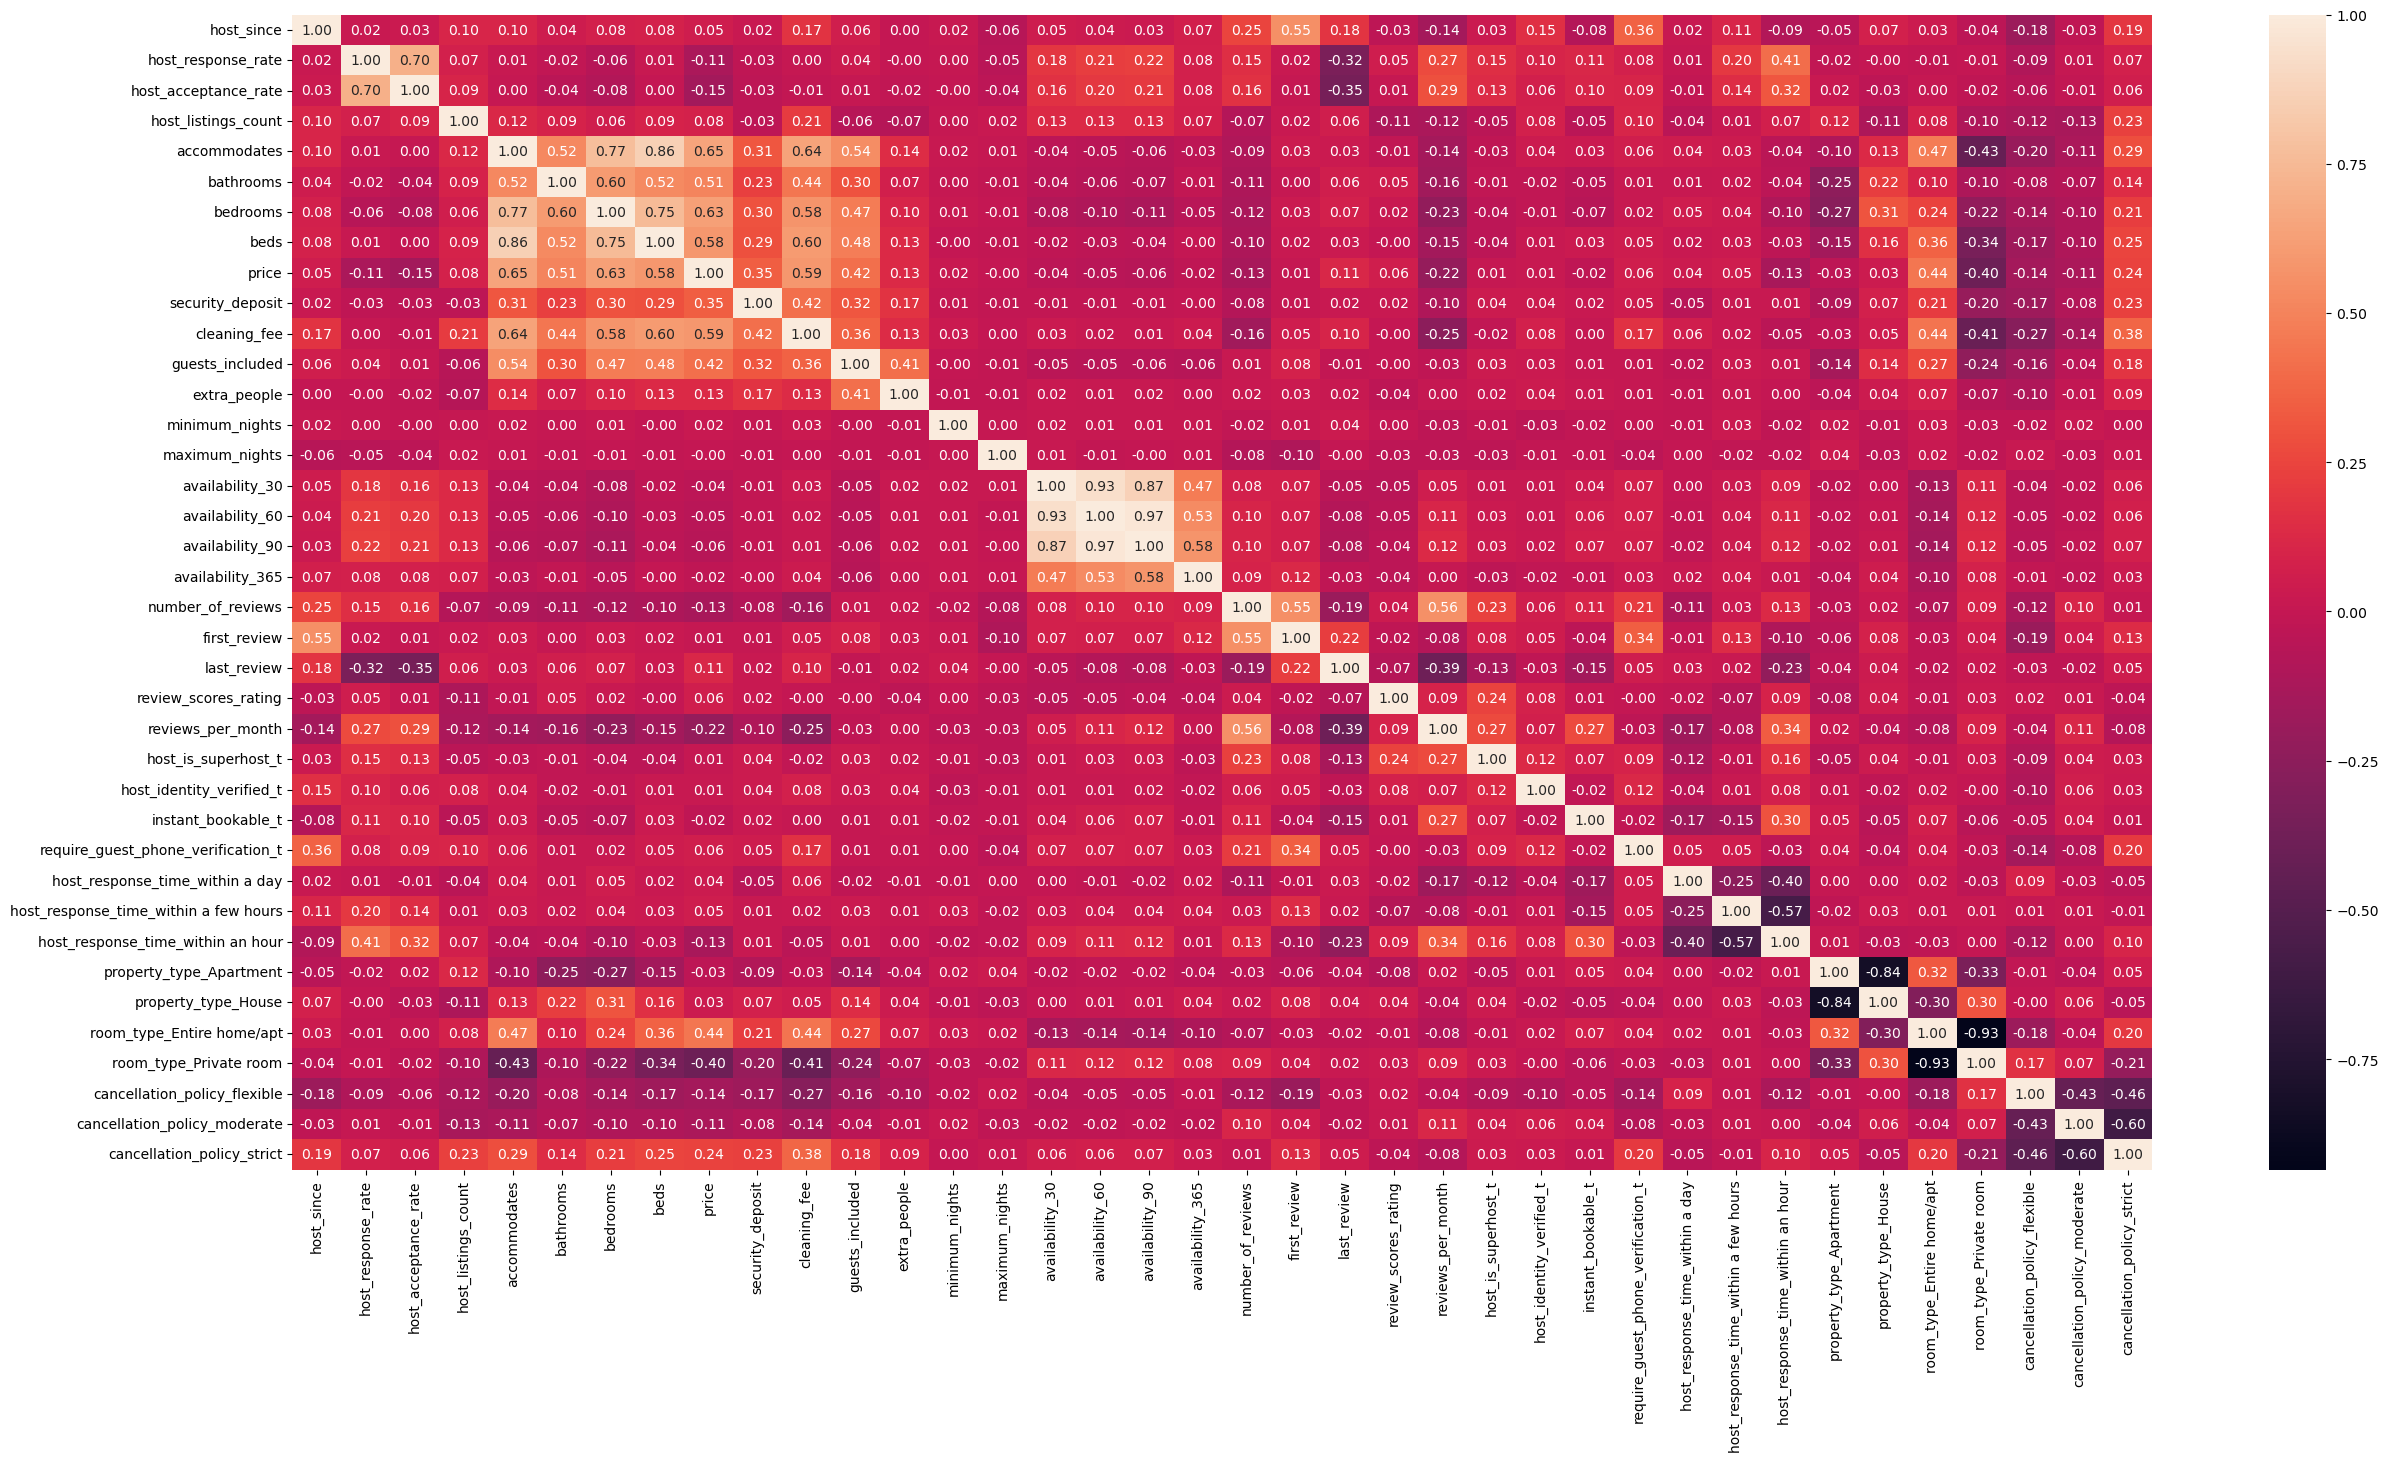

In [47]:
plt.figure(figsize = (30,15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f");

Calculate collinear columns, with correlation coefficient higher than 0.5 in absolute value

In [48]:
collinear_columns = {}
for f in correlation_matrix.columns:
    collinear_columns[f] = [i for i in correlation_matrix.index if np.abs(correlation_matrix.at[f,i])>.5 and f>i]

In [49]:
collinear_columns

{'host_since': ['first_review'],
 'host_response_rate': ['host_acceptance_rate'],
 'host_acceptance_rate': [],
 'host_listings_count': [],
 'accommodates': [],
 'bathrooms': ['accommodates'],
 'bedrooms': ['accommodates', 'bathrooms'],
 'beds': ['accommodates', 'bathrooms', 'bedrooms'],
 'price': ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee'],
 'security_deposit': [],
 'cleaning_fee': ['accommodates', 'bedrooms', 'beds'],
 'guests_included': ['accommodates'],
 'extra_people': [],
 'minimum_nights': [],
 'maximum_nights': [],
 'availability_30': [],
 'availability_60': ['availability_30', 'availability_365'],
 'availability_90': ['availability_30', 'availability_60', 'availability_365'],
 'availability_365': [],
 'number_of_reviews': ['first_review'],
 'first_review': [],
 'last_review': [],
 'review_scores_rating': [],
 'reviews_per_month': ['number_of_reviews'],
 'host_is_superhost_t': [],
 'host_identity_verified_t': [],
 'instant_bookable_t': [],
 'require_guest_p

In [50]:
collinear_columns_list = []
for key in collinear_columns:
    collinear_columns_list.extend(collinear_columns[key])
collinear_columns_list

['first_review',
 'host_acceptance_rate',
 'accommodates',
 'accommodates',
 'bathrooms',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'accommodates',
 'bedrooms',
 'beds',
 'accommodates',
 'availability_30',
 'availability_365',
 'availability_30',
 'availability_60',
 'availability_365',
 'first_review',
 'number_of_reviews',
 'host_response_time_within a few hours',
 'property_type_Apartment',
 'room_type_Entire home/apt',
 'cancellation_policy_moderate']

Remove collinear columns from the dataset

In [51]:
df_regression = df_regression.drop(collinear_columns_list, axis = 1)

#### Instance and Fit the Model

Separate predictor columns from outcome

In [52]:
X = df_regression.drop(columns = 'review_scores_rating')
y = df_regression['review_scores_rating']

No need to separate in train and test because we are only interested in main features

In [53]:
lm_model = LinearRegression(normalize=True)
lm_model.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

#### Study Linear Coefficients

Define datafrate to store linear coefficients and their absolute values: higher the value, the more important is the feature to predict average ratings

In [54]:
coefs_df = pd.DataFrame()
coefs_df['fields'] = X.columns
coefs_df['coefs'] = lm_model.coef_
coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
coefs_df

,fields,coefs,abs_coefs
12,host_is_superhost_t,3.375716,3.375716
17,host_response_time_within an hour,1.231817,1.231817
13,host_identity_verified_t,1.170432,1.170432
16,host_response_time_within a day,0.622733,0.622733
14,instant_bookable_t,-0.582545,0.582545
20,cancellation_policy_flexible,0.500832,0.500832
19,room_type_Private room,0.474909,0.474909
18,property_type_House,0.267401,0.267401
5,guests_included,-0.195324,0.195324
21,cancellation_policy_strict,-0.185172,0.185172


## Are ratings related to prices, fees or deposits?

Extract coefficients for fields related to prices, fees and deposits

In [55]:
def square(n):
    '''Takes in a number n, returns the square of n'''
    return n**2

print(square.__doc__)

Takes in a number n, returns the square of n


In [56]:
coefs_df_money = coefs_df[coefs_df.fields.isin(money_columns)]

Add a field to compute relative importance of the features

In [57]:
coefs_df_money['importance'] = coefs_df_money['abs_coefs']/max(coefs_df['abs_coefs'])

C:\Users\2100\AppData\Local\Temp\ipykernel_17252\2250599299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coefs_df_money['importance'] = coefs_df_money['abs_coefs']/max(coefs_df['abs_coefs'])


In [58]:
coefs_df_money

,fields,coefs,abs_coefs,importance
6,extra_people,-0.014971,0.014971,0.004435
3,price,0.008500,0.008500,0.002518
4,security_deposit,0.000141,0.000141,0.000042


The importance of these features is very low

## Are ratings realated to hosts' features and hosting policies?

Extract coefficients for fields related to hosts' features and hosting policies

In [59]:
host_columns = df_regression.columns[df_regression.columns.str.contains('host')]
host_columns

Index(['host_since', 'host_response_rate', 'host_listings_count',
       'host_is_superhost_t', 'host_identity_verified_t',
       'host_response_time_within a day', 'host_response_time_within an hour'],
      dtype='object')

In [60]:
coefs_df_host = coefs_df[coefs_df.fields.isin(host_columns)]

Add a field to compute relative importance of the features

In [61]:
coefs_df_host['importance'] = coefs_df_host['abs_coefs']/max(coefs_df['abs_coefs'])

C:\Users\2100\AppData\Local\Temp\ipykernel_17252\1025499234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coefs_df_host['importance'] = coefs_df_host['abs_coefs']/max(coefs_df['abs_coefs'])


In [62]:
coefs_df_host

,fields,coefs,abs_coefs,importance
12,host_is_superhost_t,3.375716,3.375716,1.000000
17,host_response_time_within an hour,1.231817,1.231817,0.364905
13,host_identity_verified_t,1.170432,1.170432,0.346721
16,host_response_time_within a day,0.622733,0.622733,0.184474
2,host_listings_count,-0.026217,0.026217,0.007766
0,host_since,-0.000281,0.000281,0.000083
1,host_response_rate,-0.000117,0.000117,0.000035


These fields are among the most important